🧩 Time Series Decomposition — breaking your series into Trend + Seasonality + Residuals.

This is the core idea behind understanding patterns before forecasting.

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Generate dates
dates = pd.date_range(start='2023-01-01', periods=180, freq='D')

1️⃣ Trend:
🔹 What it does:

np.linspace(start, end, num_points) creates evenly spaced numbers between start and end.

Here, it generates 180 values linearly spaced between 10 and 30.

🔹 Meaning:

This represents a steady upward trend — the underlying long-term increase.

Example: if you’re tracking daily sales, this could mean your sales are slowly rising over time.

📈 Visually, it’s a straight line going up

2️⃣ Seasonality:
🔹 What it does:

np.sin() produces a smooth wave between -1 and 1.

Multiplying by 5 gives it an amplitude (height) of 5.

The np.linspace(0, 6 * np.pi, 180) generates values from 0 → 6π, meaning 3 full sine waves (since one full wave = 2π).

So the result looks like repeating waves:

🔹 Meaning:

This simulates repeating seasonal patterns — like daily, weekly, or monthly cycles.

Example: ice cream sales go up in summer, down in winter — that’s seasonality.

🌊 Visually, it’s an oscillating wave repeating over time.

3️⃣ Noise:
🔹 What it does:

np.random.randn(180) creates 180 random numbers from a normal distribution (mean 0, std 1).

Multiplying by 2 makes the standard deviation = 2, so the fluctuations are larger.

Meaning:

This simulates random irregularities or “unexplained” fluctuations.

Example: random daily variations in temperature, customer behavior, etc.

🎯 It adds realism — real-world data is never perfectly smooth.

In [4]:
# Create trend + seasonality + noise
trend = np.linspace(10, 30, 180)
seasonality = 5 * np.sin(np.linspace(0, 6 * np.pi, 180))
noise = np.random.randn(180) * 2

data = trend + seasonality + noise

🧮 Combine them

When you add them:

You get:

A smooth upward trend

Repeating wavy patterns

Small random ups and downs

🎨 Visually, it looks just like a real-world time series.

| Component       | Code                       | Represents         | Analogy               |
| --------------- | -------------------------- | ------------------ | --------------------- |
| **Trend**       | `np.linspace(10, 30, 180)` | Long-term movement | Company growth        |
| **Seasonality** | `5 * np.sin(...)`          | Repeating pattern  | Monthly demand cycles |
| **Noise**       | `np.random.randn(180) * 2` | Random variation   | Day-to-day randomness |


In [6]:
# Build dataframe
df = pd.DataFrame({'Date': dates, 'Value': data})
df.set_index('Date', inplace=True) #TimeIndex

df.head()

,Value
Date,
2023-01-01,12.587791
2023-01-02,8.627953
2023-01-03,7.348618
2023-01-04,11.489619
2023-01-05,11.374978


Decompose the Time Series:

seasonal_decompose(...) — the function
from statsmodels.tsa.seasonal import seasonal_decompose

This function (from statsmodels.tsa.seasonal) automatically breaks down a time series into its core components:

🔹Trend

🔹Seasonality

🔹Residual (noise)

Basically, it tries to reverse-engineer the structure of your data.

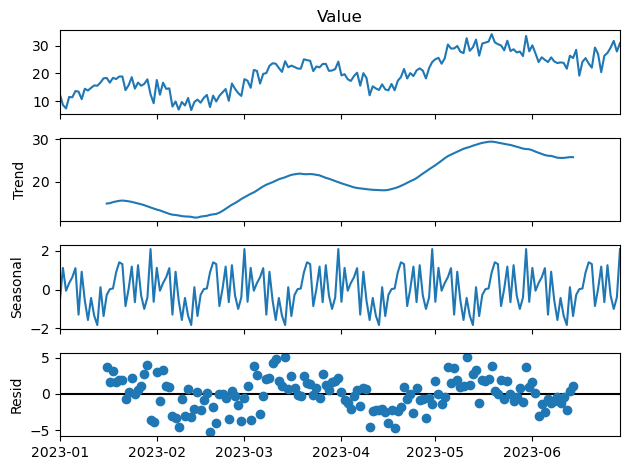

In [7]:
result = seasonal_decompose(df['Value'], model='additive', period=30)
result.plot()
plt.show()

⏱️ period=30

This tells the function how many time steps make up one full seasonal cycle.

If your data is daily, and you expect a monthly cycle, then period=30.

If it’s hourly data with a daily cycle → period=24.

If it’s monthly data with a yearly cycle → period=12.

| Attribute         | Description                    |
| ----------------- | ------------------------------ |
| `result.observed` | The original data              |
| `result.trend`    | The long-term trend component  |
| `result.seasonal` | The repeating seasonal pattern |
| `result.resid`    | The random leftover (residual) |
